CID: 01938572

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1: Sample an Interesting Chain

In [2]:
w = np.array([0.2993, 0.7007])
s = np.array([0, 1])
A1 = np.array([[0.4, -0.3733], [0.06, 0.6]])
A2 = np.array([[-0.8, -0.1867], [0.1371, 0.8]])
b1 = np.array([0.3533, 0.0])
b2 = np.array([1.1, 0.1])

def f1(x):
    return A1@x + b1

def f2(x):
    return A2@x + b2

# function for sampling from discrete distribution using inversion method
def discrete(p, s):
    cw = np.cumsum(p)
    u = np.random.uniform(0, 1)
    for k in range(len(cw)):
        if cw[k] > u:
            q = s[k]
            break
    return q

N = 10000
x0 = np.array([0, 0])
x = np.array(x0)

for i in range(N):
    q = discrete(w, s)  # sample q~Discrete(w1, w2)
    if q == 0:
        x1 = f1(x0)  # sample x1~f1(x0) if q=0
    else:
        x1 = f2(x0)
    x = np.dstack((x, x1))  # sample x1~f2(x0) if q=1
    x0 = x1

x = x.reshape(2, 10001)
x = np.delete(x, 0, axis=1)

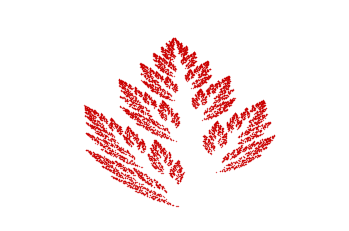

In [3]:
plt.scatter(x[0, 20:N], x[1, 20:N], s=0.1, color=[0.8, 0, 0])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_xlim(0, 1.05)
plt.gca().set_ylim(0, 1)
plt.show()

# Q2: Sample a State-Space Model
## Simulate a Gaussian time-series corrupted by noise

In [28]:
x0 = 1
a = 0.9
sigma_x = 0.01
sigma_y = 0.1

T = 100
x_array = np.array([])
y_array = np.array([])

for i in range(T):
    x1 = np.random.normal(a*x0, sigma_x)  # sample x1~N(ax0, sigma_x^2)
    y = np.random.normal(x1, sigma_y)  # sample y~N(x1, sigma_y^2)
    x_array = np.append(x_array, x1)
    y_array = np.append(y_array, y)
    x0 = x1

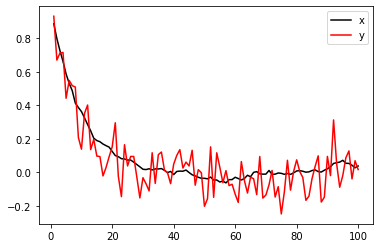

In [29]:
T_array = np.arange(1, 101)
plt.plot(T_array, x_array, color='k', linewidth=1.5, label='x')
plt.plot(T_array, y_array, color='r', linewidth=1.5, label='y')
plt.legend()
plt.show()

The model output above can be used to model time series data obtained from electronic health records of patients such as blood count, pulse rate and temperature. These time series contain noise due to observations being collected with varied time-interval period and the difference in precision of measuring instruments. Thus, the model output above can be used to model this kind of irregularly sampled, noisy time series.

## Develop a stochastic volatilty model and simulate
We check that the likihood $$y_{t}\sim\mathcal{N}(0, exp(h_{t}))$$ will be able to model the phenomena that higher volatility $(x_{t})$ means higher variance in observed returns $(y_{t})$.

In [103]:
x0 = 2
a = 0.995
sigma_x = 0.0001

N = 1000
x_array = np.array([])
y_array = np.array([])

for i in range(N):
    x1 = np.random.normal(a*x0, sigma_x)
    y = np.random.normal(0, np.exp(x1))
    x_array = np.append(x_array, x1)
    y_array = np.append(y_array, y)
    x0 = x1

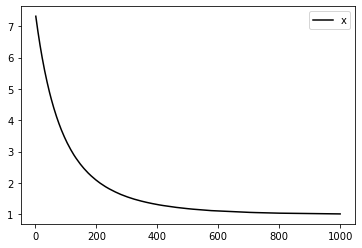

In [104]:
T_array = np.arange(1, 1001)
plt.plot(T_array, np.exp(x_array), color='k', linewidth=1.5, label='x')
plt.legend()

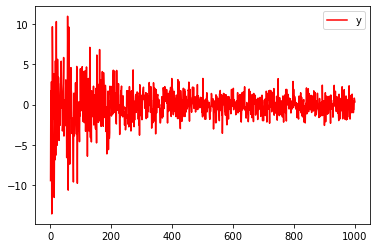

In [105]:
plt.plot(T_array, y_array, color='r', linewidth=1.5, label='y')
plt.legend()

In [204]:
x0 = 1
a = 1.001
sigma_x = 0.0001

N = 1000
x_array = np.array([])
y_array = np.array([])

for i in range(N):
    x1 = np.random.normal(a*x0, sigma_x)
    y = np.random.normal(0, np.exp(x1))
    x_array = np.append(x_array, x1)
    y_array = np.append(y_array, y)
    x0 = x1

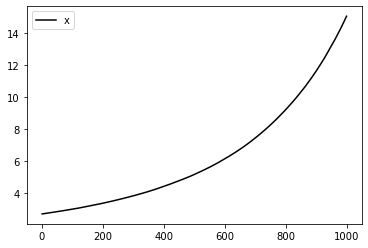

In [205]:
T_array = np.arange(1, 1001)
plt.plot(T_array, np.exp(x_array), color='k', linewidth=1.5, label='x')
plt.legend()

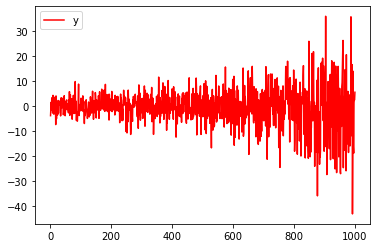

In [206]:
plt.plot(T_array, y_array, color='r', linewidth=1.5, label='y')
plt.legend()

The volatilty model below is developed based on the SV-AR(1) model. <br>
The Markov transition kernel to model the log-volatility variable, $h_{t}=log(x_{t})$ is:
$$h_{t}|h_{t-1}\sim\mathcal{N}(h_{t};\mu+\phi(h_{t-1}-\mu), \sigma^{2})$$
The likelihood is:
$$y_{t}\sim\mathcal{N}(0, exp(h_{t}))$$
where $\mu, \phi$ and $\sigma^{2}$ are set to be some pre-defined values. <br>
The prior distribution of log-volatility is:
$$h_{0}\sim\mathcal{N}(\mu, \sigma^{2}/(1-\phi^{2}))$$
where $\sigma^{2}/(1-\phi^{2})$ is the variance of a stationary AR(1) process.

In [258]:
mu = 1
phi = 0.99
sigma2 = 0.1
h0 = np.random.normal(mu, sigma2 / (1 - phi**2))  # sample h0~N(mu, sigma2/(1-phi^2))

N = 1000
h_array = np.array([])
y_array = np.array([])

for i in range(N):
    h1 = np.random.normal(mu + phi * (h0 - mu), sigma2)  # sample h1~N(mu+phi(h0-mu), sigma2)
    y = np.random.normal(0, np.exp(h1))  # sample y~N(0, exp(h1))
    h_array = np.append(h_array, h1)
    y_array = np.append(y_array, y)
    h0 = h1

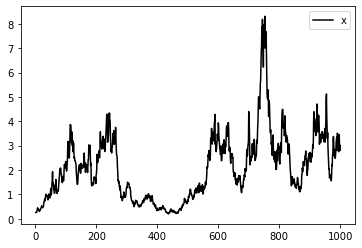

In [259]:
T_array = np.arange(1, 1001)
plt.plot(T_array, np.exp(h_array), color='k', linewidth=1.5, label='x')  # plot xt = exp({ht})
plt.legend()

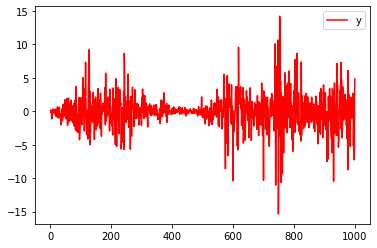

In [260]:
plt.plot(T_array, y_array, color='r', linewidth=1.5, label='y')
plt.legend()